In [20]:
import pyautogui
import time
import pyperclip
from time import gmtime, strftime

pyautogui.PAUSE = 0.3
pyautogui.FAILSAFE = True

def locate_and_click(png_file_name):
    try:
        (x, y) = pyautogui.locateCenterOnScreen(png_file_name)
        
        pyautogui.moveTo(x, y)
        time.sleep(1)
        
        pyautogui.click(x, y)
        time.sleep(1)
    except:
        print('Cannot locate:' + png_file_name)
    
def click_Blogger_tab():
    try:
        pyautogui.moveTo(650, 30)
        time.sleep(1)
        pyautogui.click()
        time.sleep(1)
    except:
        print('Cannot click Blogger tab.')
        
def click_Blog_Title():
    pyautogui.moveTo(900, 235)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def click_Facebook_Publish_button():
    locate_and_click('FacebookPublishButton.png')    
    
def click_Super_Big_button():
    locate_and_click('SuperBigButton.png')
    
def click_Add_Image_Title_button():
    locate_and_click('TitleButton.png')
    
def click_Add_Image_Title_field():
    locate_and_click('TitleField.png')
    
def click_Font_Size():
    pyautogui.moveTo(775, 295)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def scroll_down():
    pyautogui.moveTo(1100, 600)
    time.sleep(1)
    pyautogui.scroll(-10000) # scroll down
    time.sleep(1)
    
def click_Edit_area():    
    # click bottom of Edit area
    pyautogui.moveTo(575, 1010)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def click_image(y):
    scroll_down()
    time.sleep(1)
    x = 700       
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def get_file_location(file_number, file_type='original'):
    if ((file_type is 'analysis') | (file_type is 'old')):
        x = 160
    else: # 'original' or 'new'
        x = 53
    
    y = 80 + (file_number - 1) * 148
    return (x, y)

def get_file_name_location(file_number, file_type='original'):
    if ((file_type is 'analysis') | (file_type is 'old')):
        x = 160
    else: # 'original' or 'new'
        x = 53
    
    y = 114 + (file_number - 1) * 148
    return (x, y)

def get_file_name(file_number, file_type='original'):
    (file_x, file_y) = get_file_location(file_number, file_type)
    pyautogui.moveTo(file_x, file_y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

    (file_name_x, file_name_y) = get_file_name_location(file_number, file_type)
    pyautogui.moveTo(file_name_x, file_name_y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.rightClick()
    for i in range(3):
        pyautogui.press('down')
        
    #pyautogui.press('a') # Control-a
    #time.sleep(1)

    pyautogui.press('c') # copy file name to clipboard
    time.sleep(1)
    
    file_name = pyperclip.paste() # read file name from clipboard
    return file_name

def duplicate_file():
    pyautogui.rightClick()
    time.sleep(1)
    for i in range(5):
        pyautogui.press('up')
    pyautogui.press('c')
    
    pyautogui.moveRel(100, 0)
    pyautogui.rightClick()
    for i in range(4):
        pyautogui.press('down')
    pyautogui.press('p')
    time.sleep(1)
    
# Ramane file_name to file_name - Analysis
def rename_file():
    pyautogui.click()
    time.sleep(1)
    pyautogui.moveRel(0, 34)
    pyautogui.click()
    time.sleep(1)
    pyautogui.press('end')
    for i in range(4):
        pyautogui.press('left')
    for i in range(2):
        pyautogui.press('backspace')
    pyautogui.typewrite('Analysis')
    pyautogui.press('enter')
    
# Open file with Painter
def open_file():
    pyautogui.doubleClick()
    #time.sleep(7)
    time.sleep(3)
    
    # select Rectangle
    #pyautogui.moveTo(445, 65)
    pyautogui.moveTo(464, 67)
    pyautogui.click() 
    
    # select Red
    #pyautogui.moveTo(814, 62)
    
    # select Green
    pyautogui.moveTo(905, 65)
    
    # select Purple
    #pyautogui.moveTo(946, 62)
    
    # select Yellow
    #pyautogui.moveTo(858, 62)
    
    pyautogui.click() 
    
# Duplicate file, ramane it and open it with Painter
def analyze_file(file_number):
    (x, y) = get_file_location(file_number, 'original')
    pyautogui.moveTo(x, y)
    duplicate_file()
    rename_file()
    open_file()

def get_date_stamp():
    #date_stamp = time.strftime("%Y-%m-%d")
    date_stamp = time.strftime("%Y-%m-%d", gmtime())
    return date_stamp

#def get_datetime_stamp():
#    datetime_stamp = time.strftime("%Y-%m-%d %H:%M:%S", gmtime())
#    return datetime_stamp

#def get_date_stamp():
#    date_stamp = time.strftime("%Y-%m-%d")
#    return date_stamp

def get_time_stamp():
    #time_stamp = time.strftime("%Y-%m-%d")
    #time_stamp += ' '
    #time_stamp += time.strftime("%H:%M")
    #time_stamp = time.strftime("%Y-%m-%d %H:%M:%S", gmtime())
    time_stamp = time.strftime("%Y-%m-%d %H:%M UTC", gmtime())
    #time_stamp += ' UTC+8'
    #time_stamp += ' UTC'
    return time_stamp

def get_new_file_name(old_file_name, date_stamp):
    splt_old_file_name = old_file_name.split()
    old_date_stamp = splt_old_file_name[0]
    old_date = old_date_stamp[0:10]
    
    if date_stamp is None:
        new_date_stamp = get_date_stamp()
    else:
        new_date_stamp = date_stamp
    
    new_date = new_date_stamp[0:10]
    
    if (new_date == old_date):
        new_date_stamp = new_date + '-2'
  
    new_file_name = old_file_name.replace(old_date_stamp, new_date_stamp)
    #print('New file name: ' + new_file_name)
  
    return new_file_name

def name_file(file_number, new_file_name):
    (x, y) = get_file_location(file_number, 'new')
    pyperclip.copy(new_file_name) # copy new file name to clipboard
    pyautogui.moveTo(x, y)
    time.sleep(0.5)
    pyautogui.click()
    time.sleep(1)
    
    (x, y) = get_file_name_location(file_number, 'new')
    pyautogui.moveTo(x, y)
    time.sleep(0.5)
    pyautogui.click()
    time.sleep(1)
  
    pyautogui.rightClick()
    time.sleep(1)
    for i in range(4):
        pyautogui.press('down')
        #time.sleep(0.5)
    pyautogui.press('p') # paste new file name from clip board
    time.sleep(1)
    pyautogui.press('enter')

def click_WeChat_icon():
    pyautogui.moveTo(1500, 1079)
    time.sleep(1)
    pyautogui.moveTo(650, 1060)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def click_WeChat_Edit_area():
    pyautogui.moveTo(1090, 935)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
# Paste a file's name to WeChat and then drag it to WeChat
def drag_to_WeChat(file_number, file_type='original'):
    # copy file name to clipboard
    get_file_name(file_number, file_type)
    
    click_WeChat_icon()
    click_WeChat_Edit_area()

    # paste file name from clipboard
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    pyautogui.press('enter')    
    time.sleep(1)

    (x, y) = get_file_location(file_number, file_type)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.dragTo(1090, 935, 2)
    pyautogui.click()
    time.sleep(3)
    
    # click Send button
    x = 968
    y = 618
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    #time.sleep(3)
    time.sleep(1)

    #pyautogui.press('enter')    
    #time.sleep(1)
    
    click_WeChat_icon()
    
def name_new_file(file_number, date_stamp):
    old_file_name = get_file_name(file_number, 'old')
    time.sleep(1)
    new_file_name = get_new_file_name(old_file_name, date_stamp)
    time.sleep(1)
    name_file(file_number, new_file_name)

def name_new_files(file_number=1, to_WeChat=False, date_stamp=None):
    for i in range(file_number):
        name_new_file(i+1, date_stamp)
        
    if to_WeChat:
        for i in range(file_number):
            drag_to_WeChat(i+1)

def insert_enter():
    click_Blogger_tab()
    scroll_down()
    click_Edit_area()

    pyautogui.press('enter')
    time.sleep(1)
    
            
def insert_Analysis_file(file_number):    
    click_Blogger_tab()
    time.sleep(1)
    click_Edit_area()
    time.sleep(1)
    
    #print('file_number:', file_number)
    
    pyautogui.press('up')
    time.sleep(1)
    
    analysis_file_name = get_file_name(file_number, 'analysis')    
    (x, y) = get_file_location(file_number, 'analysis')
    
    pyautogui.moveTo(x, y)
    time.sleep(0.5)
    pyautogui.click()
    time.sleep(0.5)
    
    #print('file_number:', file_number)
    
    if (file_number == 1):
        (x, y) = (700, 400)
        pyautogui.dragTo(x, y, 2)
    else:
        (x, y) = (700, 957)
        #(x, y) = (700, 977)
        pyautogui.dragTo(x, y, 2)
    
    #time.sleep(7)
    #time.sleep(6)
    #time.sleep(15)
    time.sleep(30)

    scroll_down()

    click_Edit_area()
    
    if (file_number == 1):
        click_image(500)
    else:
        click_image(957)
        #click_image(977)
        
    scroll_down()
    
    click_Super_Big_button()
    scroll_down()
    
    click_Add_Image_Title_button()
    time.sleep(1)
    scroll_down()
    time.sleep(1)
    
    click_Add_Image_Title_field()
    time.sleep(1)
    pyautogui.tripleClick()
    time.sleep(1)
    
    # paste file name from clipboard
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    
    click_Font_Size()

    pyautogui.moveRel(0, 93)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

    scroll_down()
    time.sleep(1)
    
    click_Edit_area()
    time.sleep(1)
    
    pyautogui.press('up')
    time.sleep(1)

def insert_Original_file(file_number):
    click_Blogger_tab()
    time.sleep(1)
    click_Edit_area()
    time.sleep(1)
    pyautogui.press('up')
    time.sleep(1)
    
    original_file_name = get_file_name(file_number, 'original')
    (x, y) = get_file_location(file_number, 'original')
    
    pyautogui.moveTo(x, y)
    time.sleep(0.5)
    pyautogui.click()
    time.sleep(0.5)
    
    pyautogui.dragTo(700, 957, 2)
    #time.sleep(7)
    #time.sleep(6)
    #time.sleep(15)
    time.sleep(30)
    
    scroll_down()
    
    click_Edit_area()
    time.sleep(1)
    click_image(957)
    time.sleep(1)
    scroll_down()   
    
    click_Super_Big_button()
    time.sleep(1)
    scroll_down()
    
    click_Add_Image_Title_button()
    time.sleep(1)
    scroll_down()
    
    click_Add_Image_Title_field()
    time.sleep(1)
    pyautogui.tripleClick()
    time.sleep(1)
    
    # paste file name from clipboard
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    
    click_Font_Size()
    time.sleep(1)

    pyautogui.moveRel(0, 93)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

    scroll_down()
    time.sleep(1)
    click_Edit_area()
    time.sleep(1)
    pyautogui.press('up')
    time.sleep(1)

def insert_files(file_number=1):
    insert_enter()
    
    for i in range(1, file_number + 1):
        insert_Analysis_file(i)
        
    for i in range(1, file_number + 1):
        insert_Original_file(i)

def set_blog_title():
    click_Blogger_tab()
    click_Blog_Title()
    
    # paste from clipboard
    pyautogui.rightClick()
    pyautogui.press('down')
    pyautogui.press('down')
    pyautogui.press('p')
    pyautogui.press('enter')

def get_Quake_Forecast_title(
    quake_forecast, 
    languages, 
    time_stamp
):
    blog_title = {}
    for language in languages:
        blog_title[language] = quake_forecast_title[language]
        quake_number = 0
        for quake in quake_forecast:
            quake_number += 1
            blog_title[language] += '('
            blog_title[language] += str(quake_number)
            blog_title[language] += ')'
            blog_title[language] += quake['color'][language]
            blog_title[language] += Within[language]
            blog_title[language] += str(quake['time'])
            blog_title[language] += Days[language]
            blog_title[language] += quake['location'][language]
            blog_title[language] += quake['magnitude']
            blog_title[language] += Period[language]
            blog_title[language] += ' '
    
    blog_title_str = (time_stamp + ' ')
    
    for language in languages:
        blog_title_str += (blog_title[language])
    
    blog_title_str = blog_title_str.strip() # remove extra white space
    #print(blog_title_str)
    pyperclip.copy(blog_title_str) # copy to clipboard
    
    return (blog_title, blog_title_str)

def get_Quake_Forecast_text(
    quake_forecast, 
    languages, 
    time_stamp
):
    blog_text = {}
    for language in languages:
        blog_text[language] = quake_forecast_title[language] + '\n'
        quake_number = 0
        for quake in quake_forecast:
            quake_number += 1
            blog_text[language] += '('
            blog_text[language] += str(quake_number)
            blog_text[language] += ')'
            blog_text[language] += quake['color'][language]
            blog_text[language] += Within[language]
            blog_text[language] += str(quake['time'])
            blog_text[language] += Days[language]
            blog_text[language] += quake['location'][language]
            blog_text[language] += quake['magnitude']
            blog_text[language] += '\n'
        blog_text[language] += '\n'    
        blog_text[language] += author[language]
        blog_text[language] += '\n'
        blog_text[language] += time_stamp
        blog_text[language] += '\n\n\n'

    blog_text_str = ''        
    for language in languages:
        blog_text_str += blog_text[language]
    blog_text_str = blog_text_str.strip() # remove extra white space
    #print(blog_text_str)
    pyperclip.copy(blog_text_str) # copy to clipboard
    return blog_text_str
    
def get_Quake_Signals_title(
    signals, 
    languages, 
    time_stamp
): 
    blog_title = {}
    for language in languages:
        blog_title[language] = quake_signals_title[language]
        blog_title[language] += Already_happened[language]
        quake_number = 0
        for quake in signals:
            quake_number += 1
            blog_title[language] += '('
            blog_title[language] += str(quake_number)
            blog_title[language] += ')'
            blog_title[language] += quake['color'][language]
            blog_title[language] += str(quake['time'])
            blog_title[language] += ' '
            blog_title[language] += quake['location'][language]
            blog_title[language] += ' '
            blog_title[language] += quake['magnitude']
            blog_title[language] += ' '
    
    blog_title_str = (time_stamp + ' ')
    
    for language in languages:
        blog_title_str += (blog_title[language])
    
    blog_title_str = blog_title_str.strip() # remove extra white space
    #print(blog_title_str)
    pyperclip.copy(blog_title_str) # copy to clipboard
    
    return (blog_title, blog_title_str)

def get_Quake_Signals_text(
    signals, 
    languages, 
    time_stamp
):
    blog_text = {}
    for language in languages:
        blog_text[language] = quake_signals_title[language] + '\n'
        blog_text[language] += Already_happened[language] + '\n'
        quake_number = 0
        for quake in signals:
            quake_number += 1
            blog_text[language] += '('
            blog_text[language] += str(quake_number)
            blog_text[language] += ')'
            blog_text[language] += quake['color'][language]
            blog_text[language] += str(quake['time'])
            blog_text[language] += ' '
            blog_text[language] += quake['location'][language]
            blog_text[language] += ' '
            blog_text[language] += quake['magnitude']
            blog_text[language] += '\n'
        blog_text[language] += '\n'    
        blog_text[language] += author[language]
        blog_text[language] += '\n'
        blog_text[language] += time_stamp
        blog_text[language] += '\n\n\n'

    blog_text_str = ''        
    for language in languages:
        blog_text_str += blog_text[language]
    blog_text_str = blog_text_str.strip() # remove extra white space
    #print(blog_text_str)
    pyperclip.copy(blog_text_str) # copy to clipboard
    
def get_blog_address():
    click_Blogger_tab()

    pyautogui.moveTo(710, 61)
    time.sleep(1)
    #pyautogui.tripleClick()
    pyautogui.click() # click
    #time.sleep(0.1)
    pyautogui.click() # click
    #time.sleep(0.1)
    pyautogui.click() # click
    #time.sleep(0.1)
    
    pyautogui.rightClick()
    pyautogui.press('down')
    pyautogui.press('down')
    pyautogui.press('c') # copy blog address to clipboard
    blog_address = pyperclip.paste() # read blog address from clipboard
    return blog_address

def set_blog_text():
    click_Blogger_tab()
    scroll_down()
    click_Edit_area()
    pyautogui.press('backspace')

    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    #pyautogui.rightClick()
    #pyautogui.press('down')
    #pyautogui.press('down')
    #pyautogui.press('p') # paste from clipboard
    
def click_WeChat_icon():
    #pyautogui.moveTo(1000, 1079)
    pyautogui.moveTo(613, 1079)
    time.sleep(1)
    #pyautogui.moveTo(564, 1058)
    #pyautogui.moveTo(613, 1060)
    pyautogui.moveTo(655, 1060)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def click_WeChat_Edit_area():
    pyautogui.moveTo(1090, 935)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def post_to_WeChat(post_text):
    pyperclip.copy(post_text) # copy to clipboard
    
    click_WeChat_icon()
    click_WeChat_Edit_area()
    
    # paste Quake Forecast from clipboard
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    pyautogui.press('enter')
    time.sleep(1)
    
    # darg analysis file 1 to WeChat
    x = 160
    y = 70
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.dragTo(1090, 935, 2)
    #pyautogui.click()
    #time.sleep(1)
    time.sleep(3)
    
    # click Send button
    x = 968
    y = 618
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    #time.sleep(3)
    time.sleep(1)
    
    #pyautogui.press('enter')
    #time.sleep(3)
    click_WeChat_icon()
    time.sleep(1)
    
def click_Telegram_tab():
    (x, y) = (360, 30)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click() # click
    time.sleep(1)
    
def click_Telegram_Edit_area():
    (x, y) = (1020, 1013)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click() # click
    time.sleep(1)

def post_to_Telegram(post_text):
    pyperclip.copy(post_text) # copy to clipboard
    
    click_Telegram_tab()
    click_Telegram_Edit_area()
    
    # paste Quake Forecast from clipboard
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    pyautogui.press('enter')
    time.sleep(1)
    
    # darg analysis file 1 to Telegram
    x = 160
    y = 70
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.dragTo(1050, 1015, 2)
    time.sleep(3)
    
    x = 1330
    y = 300
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)


def click_Patreon_tab():
    (x, y) = (450, 30)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)
    
def click_Patreon_New_Post_button():
    click_Patreon_tab()
    
    (x, y) = (380, 486)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def click_Patreon_Images_button():
    click_Patreon_tab()
    
    (x, y) = (1235, 465)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def click_Patreon_Upload_Images_button():
    click_Patreon_tab()
    
    (x, y) = (1235, 705)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def click_Patreon_Upload_Images_field():
    click_Patreon_tab()
    
    #(x, y) = (521, 807)
    (x, y) = (420, 1015)
    pyautogui.moveTo(x, y)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

# paste analysis_file_name from clipboard
def paste_Patreon_analysis_file_name():
    click_Patreon_tab()
    
    pyautogui.hotkey('ctrl', 'v')
    time.sleep(1)
    
    #pyautogui.press('down') # get the file name extention (.png)
    #time.sleep(1)
    
    pyperclip.copy('.png') # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)

    pyautogui.press('enter')
    time.sleep(5)

def click_Patreon_Public_button():
    click_Patreon_tab()
    
    pyautogui.moveTo(1200, 580)
    time.sleep(1)

    pyautogui.scroll(-5000) # scroll down
    time.sleep(1)
    
    pyautogui.moveTo(750, 230)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    

def paste_Patreon_title(title):
    click_Patreon_tab()

    pyautogui.moveTo(888, 666)
    time.sleep(1)
    
    pyautogui.scroll(-5000) # scroll down
    time.sleep(1)
    
    pyautogui.scroll(1000) # scroll up
    time.sleep(1)

    # click title field
    pyautogui.moveTo(888, 666)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)

    pyperclip.copy(title) # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)
    #pyautogui.press('enter')
    #time.sleep(1)
    
def paste_Patreon_text(text):
    click_Patreon_tab()

    pyautogui.moveTo(910, 812)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

    pyperclip.copy(text) # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)
    #pyautogui.press('enter')
    #time.sleep(1)

def click_Patreon_Publish_Now_button():
    click_Patreon_tab()
    
    pyautogui.moveTo(1207, 551)
    time.sleep(1)

    pyautogui.scroll(-5000) # scroll down
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(5)
      
def post_to_Patreon(title, text):
    click_Patreon_New_Post_button()
    click_Patreon_Images_button()

    click_Patreon_Upload_Images_button()
    
    analysis_file_name = get_file_name(1, file_type='analysis') 
    print(analysis_file_name)
    
    click_Patreon_Upload_Images_field()
    paste_Patreon_analysis_file_name()
    
    click_Patreon_Public_button()
    
    paste_Patreon_title(title)
    paste_Patreon_text(text)
    
    click_Patreon_Publish_Now_button()
    
def get_Patreon_address():
    click_Patreon_tab()
    
    pyautogui.moveTo(710, 61)
    time.sleep(1)
    #pyautogui.tripleClick()
    pyautogui.click() # click
    #time.sleep(0.1)
    pyautogui.click() # click
    #time.sleep(0.1)
    pyautogui.click() # click
    #time.sleep(0.1)
    
    pyautogui.rightClick()
    pyautogui.press('down')
    pyautogui.press('down')
    pyautogui.press('c') # copy address to clipboard
    Patreon_address = pyperclip.paste() # read address from clipboard
    
    return Patreon_address

def click_Facebook_tab():
    pyautogui.moveTo(565, 30)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(3)

def click_Facebook_home():
    click_Facebook_tab()
    
    pyautogui.moveTo(710, 132)
    time.sleep(1)

    pyautogui.click()
    time.sleep(3)

def click_dysondyson():
    click_Facebook_home()

def click_dysondyson_edit_field():
    pyautogui.moveTo(855, 655)
    time.sleep(1)

    pyautogui.click()
    time.sleep(1)

    pyautogui.moveTo(1000, 500)
    time.sleep(1)

    pyautogui.click()
    time.sleep(1)
    
def paste_text(text):
    pyperclip.copy(text) # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)
    
def click_dysondyson_publish_button():
    #click_Facebook_tab()
    
    #pyautogui.scroll(-1050) # scroll down
    #time.sleep(1)

    pyautogui.moveTo(1091, 841)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    
def post_to_Facebook_dysondyson(text):
    click_dysondyson()
    click_dysondyson_edit_field()
    paste_text(text)
    time.sleep(3)
    click_dysondyson_publish_button()
    
    
def click_QuakeForecastInstitute():
    click_Facebook_home()
    
    pyautogui.moveTo(1615, 320)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(5)

def click_QuakeForecastInstitute_edit_field():
    click_QuakeForecastInstitute()

    #click_Facebook_tab()
    pyautogui.moveTo(1417, 670)
    time.sleep(1)
    pyautogui.scroll(-5250) # scroll down
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    
def post_to_Facebook_QuakeForecastInstitute(text):
    click_QuakeForecastInstitute()

    #click_Facebook_tab()
    pyautogui.moveTo(1417, 670)
    time.sleep(1)
    pyautogui.scroll(-5250) # scroll down
    time.sleep(1)

    #click_Facebook_tab()
    pyautogui.moveTo(1417, 670)
    time.sleep(1)

    pyautogui.click()
    time.sleep(1)

    paste_text(post_text)

    pyautogui.moveTo(1058, 1056)
    time.sleep(1)

    pyautogui.click()
    time.sleep(1)

def post_to_Facebook_QuakeTomato(text):
    click_Facebook_tab()

    pyautogui.moveTo(1425, 117)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.moveTo(331, 580)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)

    pyautogui.moveTo(713, 970)
    time.sleep(1)
    
    pyautogui.scroll(10000) # scroll up
    time.sleep(1)

    #pyautogui.scroll(-200) # scroll down
    #time.sleep(1)
    
    pyautogui.moveTo(713, 970)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)

    pyperclip.copy(text) # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)

    pyautogui.scroll(-2000) # scroll down
    time.sleep(1)
    
    locate_and_click('Facebook_Group_Publish_button.png')
    #pyautogui.moveTo(713, 814)
    time.sleep(10)
    
    pyautogui.scroll(-1000) # scroll down
    time.sleep(1)

    #pyautogui.moveTo(1317, 119)
    #time.sleep(1)
    
    #pyautogui.click()
    #time.sleep(1)
    
    #for i in range(0, 12):
    #    pyautogui.press('tab')
    #    time.sleep(1)
    #pyautogui.press('enter')
    #time.sleep(1)

def post_to_Facebook_Japanese_group(text):
    click_Facebook_tab()

    pyautogui.moveTo(1425, 117)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.moveTo(315, 630)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)

    pyautogui.moveTo(713, 970)
    time.sleep(1)
    
    pyautogui.scroll(10000) # scroll up
    time.sleep(1)

    #pyautogui.scroll(-200) # scroll down
    #time.sleep(1)
    
    pyautogui.moveTo(713, 970)
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)

    pyperclip.copy(text) # copy to clipboard
    pyautogui.hotkey('ctrl', 'v') # paste from clipboard
    time.sleep(1)

    pyautogui.scroll(-2000) # scroll down
    time.sleep(1)
    
    locate_and_click('Facebook_Group_Publish_button.png')
    #pyautogui.moveTo(713, 814)
    time.sleep(10)
    
    pyautogui.scroll(-1000) # scroll down
    time.sleep(1)

    #pyautogui.moveTo(1317, 119)
    #time.sleep(1)
    
    #pyautogui.click()
    #time.sleep(1)
    
    #for i in range(0, 12):
    #    pyautogui.press('tab')
    #    time.sleep(1)
    #pyautogui.press('enter')
    #time.sleep(1)

def publish_blog():
    pyautogui.moveTo(1715, 219)
    time.sleep(5)
    pyautogui.click()
    time.sleep(1)
    
def view_blog():
    click_Blogger_tab()
    time.sleep(1)
    pyautogui.moveTo(833, 504)
    time.sleep(1)
    pyautogui.moveTo(833, 506)
    time.sleep(1)
    pyautogui.click()
    time.sleep(1)

def close_Blogger_article_list():
    click_Blogger_tab()
    time.sleep(1)
    
    pyautogui.click()
    time.sleep(1)
    
    pyautogui.rightClick()
    time.sleep(1)

    for i in range(0, 9):
        pyautogui.press('down')
    
    time.sleep(1)
    pyautogui.press('enter')

    pyautogui.moveRel(80, 0)
    time.sleep(2)
    
    
    
def post_Quake_Forecast(
    quake_forecast, 
    time_stamp,
    blog_address, 
    blog_title_str
):
    # Post to Telegram
    Telegram_languages = ['Chinese', 'Japanese', 'English']
    (blog_title_Telegram, blog_title_str_Telegram) = get_Quake_Forecast_title(
        quake_forecast,
        Telegram_languages, 
        time_stamp)
    post_text_Telegram = blog_title_str_Telegram + '\n' + blog_address
    pyperclip.copy(post_text_Telegram) # copy to clipboard
    post_to_Telegram()

    # Post to WeChat
    post_text_WeChat = blog_title_str + '\n' + blog_address    
    pyperclip.copy(post_text_WeChat) # copy to clipboard
    post_to_WeChat()

    # Post to Patreon
    post_text_Patreon = post_text_WeChat
    post_to_Patreon(blog_title_str, post_text_Patreon)

    # Post to Facebook
    Patreon_address = get_Patreon_address()
    #print(Patreon_address)
    text_Facebook = blog_title_str + '\n' + Patreon_address
    print(text_Facebook)
    post_to_Facebook_dysondyson(text_Facebook)
    post_to_Facebook_QuakeForecastInstitute(text_Facebook)
    post_to_Facebook_QuakeTomato(text_Facebook)
    post_to_Facebook_Japanese_group(text_Facebook)
    click_dysondyson()
    

def publish_Quake_Forecast(quake_forecast, languages, time_stamp):
    (blog_title, blog_title_str) = get_Quake_Forecast_title(quake_forecast, 
                                          languages, time_stamp)
    set_blog_title()
    get_Quake_Forecast_text(quake_forecast, languages, time_stamp)
    set_blog_text()
    publish_blog()
    time.sleep(15)
    return (blog_title, blog_title_str)    
    
quake_forecast_title = {
    'Chinese': '地震預報：',
    'Japanese': '地震予報：',
    'English': 'Quake Forecast: ',
    'Turkish': 'Deprem Tahmini: ',
}

quake_signals_title = {
    'Chinese': '地震訊號：',
    'Japanese': '地震信号：',
    'English': 'Quake Signals: ',
    'Turkish': 'Deprem Sinyalleri: ',
}

author = {
    'Chinese': '台灣地震預測研究所 所長\n林湧森',
    'Japanese': '台湾地震予測研究所 所長\n林湧森',
    'English': 'Dyson Lin\nFounder & CEO, Taiwan Quake Forecast Institute',
    'Turkish': 'Dyson Lin\nKurucu ve CEO, Tayvan Deprem Tahmin Enstitüsü',
}

Already_happened = {
    'Chinese': '已經發生：',
    'Japanese': '発生しました：',
    'English': 'Already happened: ',
    'Turkish': 'Zaten oldu: ',
}

Within = {
    'Chinese': '',
    'Japanese': '',
    'English': 'Within ',
    'Turkish': 'İçinde ',
}

Days = {
    'Chinese': '天以內，',
    'Japanese': '日間以內に、',
    'English': ' days, ',
    'Turkish': ' günler, ',
}

Period = {
    'Chinese': '。',
    'Japanese': '。',
    'English': '.',
    'Turkish': '.',
}

Red = {
    'Chinese': '紅：',
    'Japanese': '赤：',
    'English': 'Red: ',
    'Turkish': 'Kırmızı: ',
}

Orange = {
    'Chinese': '橙：',
    'Japanese': 'オレンジ：',
    'English': 'Orange: ',
    'Turkish': 'Portakal: ',
}

Yellow = {
    'Chinese': '黃：',
    'Japanese': '黃：',
    'English': 'Yellow: ',
    'Turkish': 'Sarı: ',
}

Green = {
    'Chinese': '綠：',
    'Japanese': '綠：',
    'English': 'Green: ',
    'Turkish': 'Yeşil: ',
}

Blue = {
    'Chinese': '藍：',
    'Japanese': '青：',
    'English': 'Blue: ',
    'Turkish': 'Mavi: ',
}

Purple = {
    'Chinese': '紫：',
    'Japanese': '紫：',
    'English': 'Purple: ',
    'Turkish': 'Mor: ',
}

In [3]:
get_time_stamp()

'2022-01-15 20:01 UTC'

In [ ]:
insert_enter()
insert_Analysis_file(1)
insert_Analysis_file(2)
#insert_Analysis_file(3)

In [ ]:
日本奈良站開始運轉。
可喜可賀。

日本奈良局が稼動を開始しました。
喜ばしいです。

Nara, Japan Station has started running.
Congratulations.

台灣地震預測研究所 所長 
林湧森
台湾地震予測研究所 所長 
林湧森
Dyson Lin
Founder & CEO, Taiwan Quake Forecast Institute
2020-06-26 22:22 UTC+8

In [ ]:
2015-02-16 23:06 UTC Miyako, Japan M6.7
2016-02-05 19:57 UTC Yujing, Taiwan M6.4
2016-07-29 21:18 UTC Agrihan, Northern Mariana Islands M7.7
2017-07-17 23:34 UTC Nikol'skoye, Russia M7.7 

In [ ]:
2015-09-16 22:54 UTC Illapel, Chile M8.3
2016-12-17 10:51 UTC Taron, Papua New Guinea M7.9

In [ ]:
2017-09-08 04:49 UTC Tres Picos, Mexico M8.2
2018-08-19 00:19 UTC Ndoi Island, Fiji M8.2 
2018-09-28 10:02 UTC Palu, Indonesia M7.5
2019-05-26 07:41 UTC Lagunas, Peru M8.0
2019-07-06 03:19 UTC California M7.1
2019-08-29 15:07 UTC Oregon M6.3
2020-01-28 19:10 UTC Lucea, Jamaica M7.7
2020-03-25 02:49 UTC Kuril Islands, Russia M7.5
2020-07-22 06:12 UTC Perryville, Alaska M7.8
2021-03-04 19:28 UTC Kermadec Islands, New Zealand M8.1
2021-07-29 06:15 UTC Perryville, Alaska M8.2

In [ ]:
1994-01-17 12:30 UTC California M6.7 
1995-01-16 20:46 UTC Japan M6.9
2011-03-09 02:45 UTC near the east coast of Honshu, Japan M7.3
2011-03-11 05:46 UTC Great Tohoku Earthquake, Japan M9.1

In [ ]:
2019-11-26 02:54 UTC Mamurras, Albania M6.4
2020-01-24 17:55 UTC Elazig, Turkey M6.7
2020-02-23 16:00 UTC Near Van, Turkey M6.0
2020-05-02 12:51 UTC Ierapetra, Greece M6.6
2020-10-30 11:51 UTC Néon Karlovásion, Greece M7.0
2020-12-29 11:19 UTC Petrinja, Croatia M6.4
2021-03-03 10:16 UTC Týrnavos, Greece M6.3
        
2020-01-18 16:38 UTC Indonesia M6.0
2020-01-19 16:58 UTC Indonesia M6.1
2020-02-05 18:12 UTC Ujungpangkah, Indonesia M6.2
2020-02-06 13:40 UTC Pondaguitan, Philippines M6.0
2020-02-09 06:04 UTC Kokopo, Papua New Guinea M6.2
2020-03-18 17:45 UTC Kangin, Indonesia M6.2

2019-12-24 19:03 UTC Lejanias, Colombia M6.0
2020-01-07 08:24 UTC Indios, Puerto Rico 6.4
2020-01-28 19:10 UTC Lucea, Jamaica M7.7

In [ ]:
2020-02-13 10:33 UTC Kuril Islands, Russia M7.0
2020-03-25 02:49 UTC Kuril Islands, Russia M7.5
2020-03-31 23:52 UTC Challis, Idaho M6.5
2020-04-18 08:25 UTC Chichi-shima, Japan M6.6
2020-04-19 20:39 UTC Ofunato, Japan M6.3
2020-04-25 02:53 UTC Panguna, Papua New Guinea M6.3
2020-05-02 12:51 UTC Ierapetra, Greece M6.6
2020-05-03 03:24 UTC Taitung, Taiwan M5.1
2020-05-06 13:53 UTC Saumlaki, Indonesia M6.8
2020-05-12 22:41 UTC Lata, Solomon Islands M6.6
2020-05-15 11:03 UTC Tonopah, Nevada M6.5
2020-05-18 04:18 UTC Ierapetra, Greece M5.3 
2020-05-18 23:22 UTC Gra Liyia, Greece M5.8
2020-05-22 08:46 UTC San Jose del Cabo, Mexico M6.1
2020-05-30 18:13 UTC Kushiro, Japan M5.6  
2020-05-31 05:09 UTC Lampa, Peru M6.0 
2020-06-03 07:35 UTC San Pedro de Atacama, Chile M6.8
2020-06-04 08:49 UTC Tobelo, Indonesia M6.4
2020-06-05 18:06 UTC Malatya, Turkey M5.3 
2020-06-07 01:49 UTC Hualien, Taiwan M4.8
2020-06-08 14:34 UTC Taitung, Taiwan M4.3
2020-06-11 01:38 UTC Yilan, Taiwan M5.2
2020-06-13 15:51 UTC Naze, Japan M6.6
2020-06-13 20:19 UTC Yilan, Taiwan M6.0
2020-06-14 14:24 UTC Bingol, Turkey M5.9
2020-06-18 12:49 UTC Opotiki, New Zealand M7.4
2020-06-19 07:43 UTC Néa Anatolí, Greece M5.0 
2020-06-20 01:57 UTC Hihifo, Tonga M5.4
2020-06-23 07:43 UTC Gorontalo, Indonesia M5.9 
2020-06-23 15:29 UTC Santa María Zapotitlán, Mexico M7.4
2020-06-25 21:05 UTC Hotan, China M6.4
2020-06-26 07:21 UTC Manisa, Turkey M5.5
2020-06-26 23:27 UTC Kaohsiung, Taiwan M4.8
2020-06-28 17:43 UTC Mugla, Turkey M5.4  
2020-07-17 02:50 UTC Popondetta, Papua New Guinea M7.0
2020-07-18 12:30 UTC Yonakuni, Japan M4.5
2020-07-18 15:32 UTC Hihifo, Tonga M6.1
2020-07-22 06:12 UTC Perryville, Alaska M7.8
2020-07-26 12:52 UTC Yilan, Taiwan M6.1
2020-08-01 17:09 UTC Polloc, Philippines M6.4
2020-08-03 08:31 UTC Saipan, Northern Mariana Islands M5.6
2020-08-04 09:37 UTC Malatya, Turkey M5.7
2020-08-21 04:09 UTC Katabu, Indonesia M6.9

In [ ]:
1995-01-16 20:46 UTC western Honshu, Japan M6.9
1999-09-20 17:47 UTC Nantou, Taiwan M7.7
2011-03-09 02:45 UTC Honshu, Japan M7.3
2011-03-11 05:46 UTC Honshu, Japan M9.1
2016-04-14 12:26 UTC Kumamoto, Japan M6.2
2016-04-15 16:25 UTC Kumamoto, Japan M7.0
2018-09-05 18:07 UTC Tomakomai, Japan M6.6
2019-09-26 10:59 UTC Silivri, Turkey M5.7

In [ ]:
1999-08-17 00:01 UTC İzmit, Turkey M7.6
1999-09-20 17:47 UTC Nantou, Taiwan M7.7
1999-11-12 16:57 UTC Düzce, Turkey M7.2
2020-01-24 17:55 UTC Elazig, Turkey M6.7

In [ ]:
2020-08-04 09:37 UTC Malatya, Turkey M5.7
2020-08-11 01:01 UTC Yilan, Taiwan M4.7
2020-08-11 05:29 UTC Taitung, Taiwan M4.6 
2020-08-11 23:07 UTC Yonakuni, Japan M4.5
2020-08-12 22:32 UTC Basco, Philippines M5.5 
2020-08-16 02:53 UTC Basco, Philippines M5.0
2020-08-16 07:22 UTC Bantogon, Philippines M5.2 
2020-08-17 07:27 UTC Ýdra, Greece M5.0
2020-08-18 00:03 UTC San Pedro, Philippines M6.6
2020-08-18 22:23 UTC Bengkulu, Indonesia M6.8
2020-08-18 22:29 UTC Bengkulu, Indonesia M6.9
2020-08-21 04:09 UTC Katabu, Indonesia M6.9
2020-08-24 04:21 UTC Kayseri, Turkey M2.6
2020-09-12 02:44 UTC Ōfunato, Japan M6.1
2020-09-15 03:41 UTC Esso, Russia M6.4
2020-10-19 20:54 UTC Sand Point, Alaska M7.6
2020-10-30 11:51 UTC Néon Karlovásion, Greece M7.0
2020-11-22 00:54 UTC Constitución, Chile M6.1
2020-11-30 22:54 UTC Sovetskaya Gavan', Russia M6.4
2020-12-10 13:19 UTC Yilan, Taiwan M6.1
2020-12-20 17:23 UTC Hachinohe, Japan M6.3
2020-12-24 23:43 UTC Calatagan, Philippines M6.3
2020-12-27 21:39 UTC Corral, Chile M6.7
2020-12-29 11:19 UTC Petrinja, Croatia M6.4
2021-01-03 12:38 UTC Adak, Alaska M6.1
2021-01-06 20:59 UTC Gorontalo, Indonesia M6.1
2021-01-09 11:35 UTC Yilan, Taiwan M5.7
2021-01-11 21:32 UTC Turt, Mongolia M6.7 
2021-01-14 18:28 UTC Mamuju, Indonesia M6.2 
2021-01-21 12:23 UTC Pondaguitan, Philippines M7.0
2021-02-03 05:23 UTC Easter Island M6.9
2021-02-06 17:36 UTC Yonakuni, Japan M5.4
2021-02-10 13:19 UTC Loyalty Islands M7.7 
2021-02-13 14:07 UTC Namie, Japan M7.1
2021-03-03 10:16 UTC Týrnavos, Greece M6.3
2021-03-04 13:27 UTC Gisborne, New Zealand M7.3   
2021-03-04 17:41 UTC Kermadec Islands, New Zealand M7.4
2021-03-04 19:28 UTC Kermadec Islands, New Zealand M8.1
2021-03-18 00:04 UTC Bejaïa, Algeria M6.0
2021-03-20 09:09 UTC Ishinomaki, Japan M7.0
2021-03-26 22:02 UTC Hirara, Japan M5.9
2021-04-18 14:14 UTC Hualien, Taiwan M5.8
2021-05-21 18:04 UTC Southern Qinghai, China M7.3
2021-07-21 21:15 UTC Punta de Burica, Panama M6.7
2021-07-23 20:48 UTC Hukay, Philippines M6.7
2021-07-24 12:51 UTC Kermadec Islands M6.1
2021-07-26 12:09 UTC Luwuk, Indonesia M6.2
2021-07-29 06:15 UTC Perryville, Alaska M8.2 
2021-08-04 21:50 UTC Yilan, Taiwan M5.8
2021-08-11 17:46 UTC Pondaguitan, Philippines M7.1
2021-08-12 18:32 UTC South Sandwich Islands M7.5
2021-08-12 18:35 UTC South Sandwich Islands M8.1
2021-08-14 11:57 UTC Perryville, Alaska M6.9 
2021-08-14 12:29 UTC Saint-Louis du Sud, Haiti M7.2 
2021-08-18 10:10 UTC Port-Olry, Vanuatu M6.9
2021-09-08 01:47 UTC Acapulco, Mexico M7.0
2021-09-13 10:41 UTC Puli, Taiwan M4.9
2021-09-25 22:21 UTC Hualien City, Taiwan M5.0 
2021-09-26 17:12 UTC Talisay, Philippines M5.7
2021-09-29 08:37 UTC Nanao, Japan M6.1
2021-10-09 10:58 UTC Vanuatu M6.8
2021-10-24 05:11 UTC Yilan, Taiwan M6.2 
2021-11-10 15:45 UTC Hirara, Japan M6.6 
2021-11-25 23:45 UTC Falam, Myanmar M6.2
2021-11-28 10:52 UTC Barranca, Peru M7.5
2021-11-29 12:40 UTC Izu Islands, Japan M6.3
2021-11-30 10:36 UTC Kavieng, Papua New Guinea M6.3
2021-12-04 23:47 UTC Tobelo, Indonesia M6.0
2021-12-08 00:36 UTC Oregon M5.8 
2021-12-08 01:21 UTC Oregon M5.8
2021-12-09 02:05 UTC Naze, Japan M6.0
2021-12-14 03:20 UTC Maumere, Indonesia M7.3
2021-12-20 20:10 UTC Petrolia, California M6.2
2021-12-22 23:22 UTC La Cruz de Loreto, Mexico M6.0
2021-12-26 15:42 UTC Levuka, Fiji M6.1
2021-12-26 08:26 UTC Hirara, Japan M5.9
2021-12-29 18:25 UTC Lospalos, Timor Leste M7.3
2022-01-03 09:46 UTC Hualien, Taiwan M6.0 
2022-01-07 17:45 UTC Jinchang, China M6.6 
2022-01-11 11:35 UTC Nikolski, Alaska M6.8
2022-01-14 09:05 UTC Labuan, Indonesia M6.6
2022-01-15 04:20 UTC Tonga Volcano Eruption
2022-01-21 16:08 UTC Saiki, Japan M6.3
2022-01-25 14:35 UTC Yilan, Taiwan M4.5
2022-01-27 06:40 UTC Pangai, Tonga M6.2 
2022-01-28 11:14 UTC Arenas, Panama M6.1
2022-01-29 02:46 UTC Kermadec Islands M6.5
2022-02-03 15:58 UTC Barranca, Peru M6.5
2022-02-07 10:58 UTC Yilan, Taiwan M5.2
2022-02-11 16:43 UTC Hualien City, Taiwan M5.5

In [ ]:
An M6.9 big quake happened in Alaska, as I predicted (https://www.patreon.com/posts/54867909).
2021-08-14 11:57 UTC Perryville, Alaska M6.9


In [ ]:
2008-05-12 06:28 UTC eastern Sichuan, China M7.9

In [1484]:
#let's download earthquakes from USGS

'''import obspy
from matplotlib import pyplot as plt
from obspy.clients.fdsn import Client as FDSN_Client

usgs = FDSN_Client("USGS") #establish connection in the same way as auspass. n.b."USGS" has its own shortcut, no address needed

#let's just download ALL earthquakes in the southern hemisphere during January 2016 greater than M6
events = usgs.get_events(starttime=obspy.UTCDateTime(2016,1,1), endtime=obspy.UTCDateTime(2016,2,1), maxlatitude=0, minmagnitude=6)

#show results & plot
print(events)
events.plot()
plt.close()'''

'import obspy\nfrom matplotlib import pyplot as plt\nfrom obspy.clients.fdsn import Client as FDSN_Client\n\nusgs = FDSN_Client("USGS") #establish connection in the same way as auspass. n.b."USGS" has its own shortcut, no address needed\n\n#let\'s just download ALL earthquakes in the southern hemisphere during January 2016 greater than M6\nevents = usgs.get_events(starttime=obspy.UTCDateTime(2016,1,1), endtime=obspy.UTCDateTime(2016,2,1), maxlatitude=0, minmagnitude=6)\n\n#show results & plot\nprint(events)\nevents.plot()\nplt.close()'

1732750
[-5870 -5849 -5820 ..., -2208 -2192 -2037]


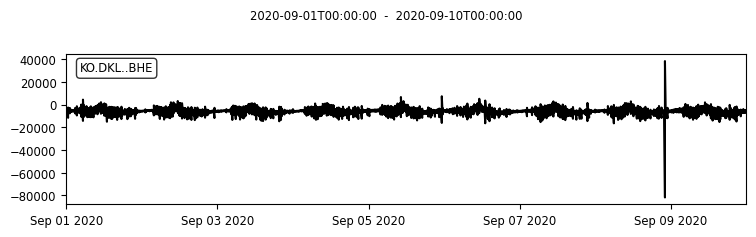

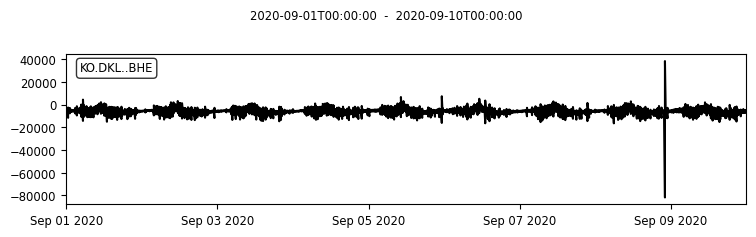

In [367]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2020-09-01T00:00:00")
t2 = UTCDateTime("2020-09-10T00:00:00")
st = client.timeseries("KO", "DKL", "", "BHE", t1, t2,
    #filter=[
        #"decimate=3"
        #"decimate=20"
    #],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [503]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2020-10-05T00:00:00")
t2 = UTCDateTime("2020-10-25T00:00:00")
st = client.timeseries("KO", "SNOP", "", "BHN", t1, t2,
    #filter=[
        #"decimate=3"
        #"decimate=20"
    #],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

KeyboardInterrupt: 

19835792
[-1688. -1686. -1688. ..., -1384. -1390. -1414.]


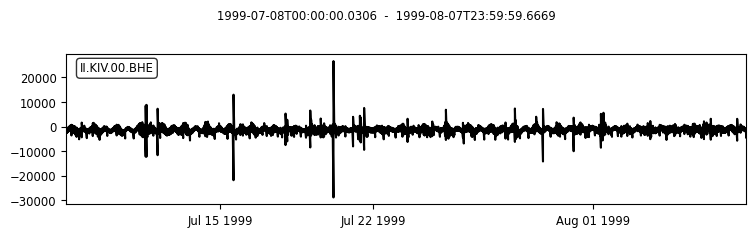

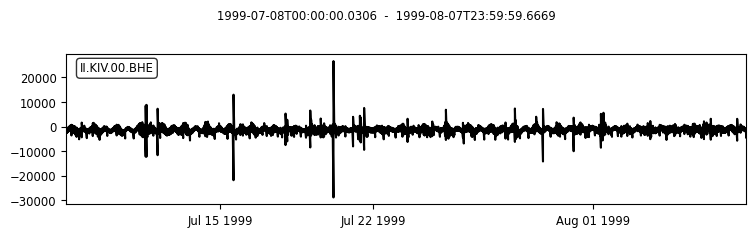

In [707]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("1999-07-08T00:00:00")
t2 = UTCDateTime("1999-08-08T00:00:00")
st = client.timeseries("II", "KIV", "00", "BHE", t1, t2,
    #filter=[
        #"decimate=3"
        #"decimate=20"
    #],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

10369855
[ 1103.  1112.  1126. ...,  1095.  1089.  1084.]


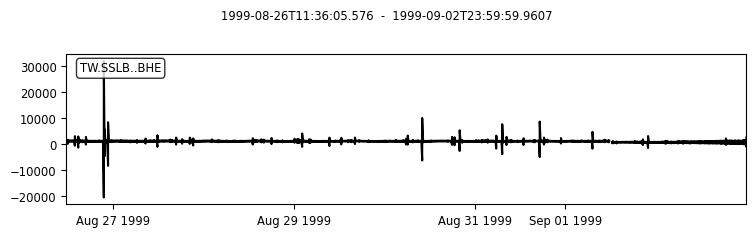

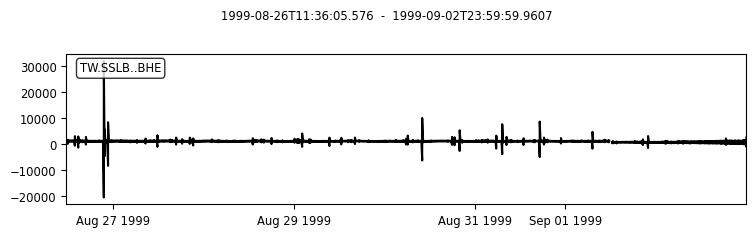

In [698]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("1999-09-20T00:00:00")
t2 = UTCDateTime("1999-09-22T00:00:00")
st = client.timeseries("TW", "TWGB", "", "BHE", t1, t2,
    #filter=[
        #"decimate=3"
        #"decimate=20"
    #],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

17280000
[ 884.  864.  834. ...,  579.  561.  534.]


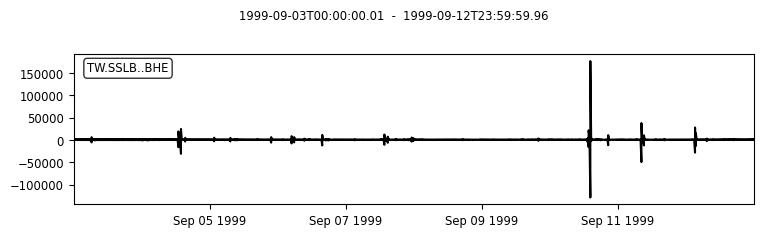

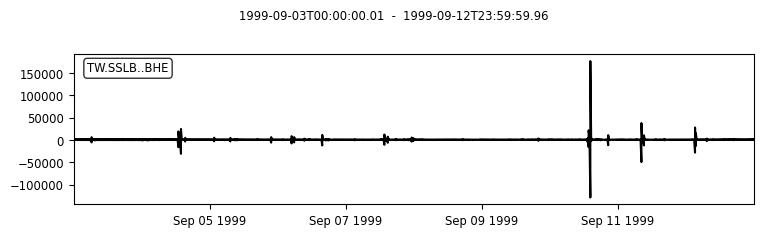

In [694]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("1999-09-03T00:00:00")
t2 = UTCDateTime("1999-09-13T00:00:00")
st = client.timeseries("TW", "SSLB", "", "BHE", t1, t2,
    filter=[
        #"decimate=3"
        "decimate=20"
    ],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

1282018
[  9.08000000e+02   9.24000000e+02   9.28000000e+02 ...,   3.66442800e+06
   4.37777700e+06   4.27379600e+06]


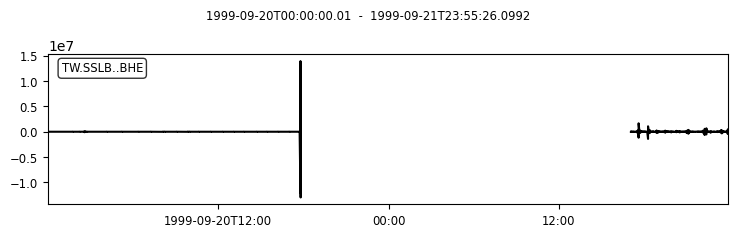

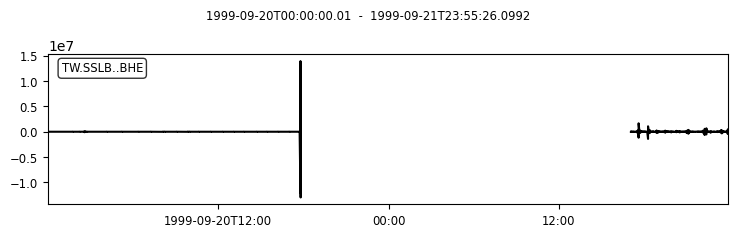

In [674]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("1999-09-20T00:00:00")
t2 = UTCDateTime("1999-09-22T00:00:00")
st = client.timeseries("TW", "SSLB", "", "BHE", t1, t2,
    filter=[
        #"decimate=3"
        "decimate=20"
    ],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

9886728
[  1326206.   1326572.   1326280. ..., -37143576. -37143510. -37143612.]


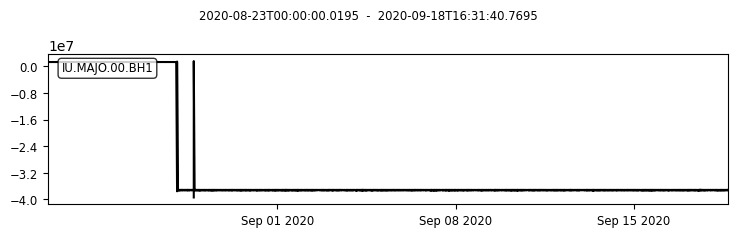

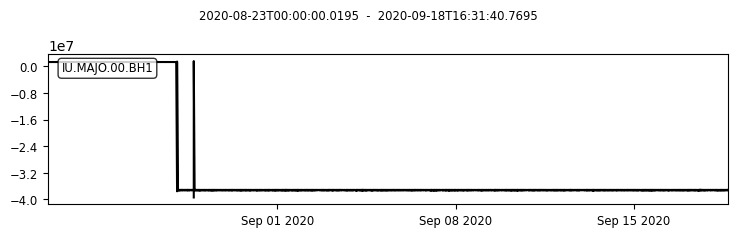

In [2401]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2020-08-23T00:00:00")
t2 = UTCDateTime("2020-09-28T00:00:00")
st = client.timeseries("IU", "MAJO", "00", "BH1", t1, t2,
    filter=[
        #"decimate=3"
        "decimate=20"
    ],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in M

51840000
[-1235 -1654 -1187 ..., -2680 -1644 -2079]


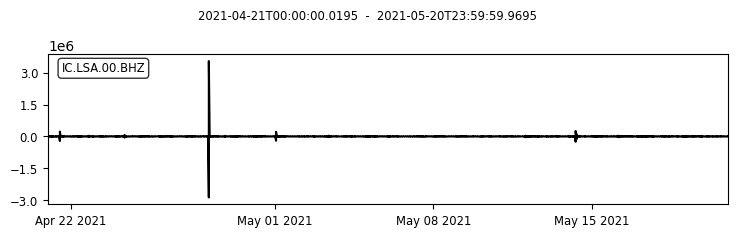

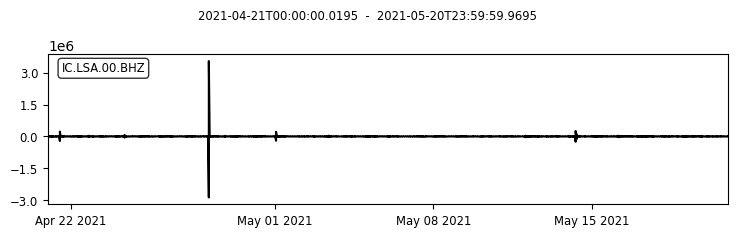

In [67]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2021-04-21T00:00:00")
t2 = UTCDateTime("2021-05-21T00:00:00")
st = client.timeseries("IC", "LSA", "00", "BHZ", t1, t2,
    #filter=[
        #"decimate=3"
        #"decimate=20"
    #],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [ ]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2020-08-08T00:00:00")
t2 = UTCDateTime("2020-08-18T00:00:00")
st = client.timeseries("PB", "B057", "", "EH1", t1, t2,
    filter=[
        "decimate=3"
        #"decimate=20"
        #"decimate=100"
    ],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [ ]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

client = Client()

t1 = UTCDateTime("2020-08-04T00:00:00")
t2 = UTCDateTime("2020-08-05T00:00:00")
st = client.timeseries("KO", "GAZ", "", "BHE", t1, t2,
    filter=[
        "decimate=3"
        #"decimate=20"
    ],
)
print(len(st[0].data))
print(st[0].data)
st.plot()

In [394]:
%matplotlib inline
from obspy.clients.iris import Client
from obspy import UTCDateTime

t1 = UTCDateTime("2011-01-21T00:00:00")
t2 = UTCDateTime("2011-03-11T00:00:00")

diff_t = int((t2 - t1) / 86400)
diff_t

49

In [ ]:
Tomato plant voltage signals (0.1 Hz high-pass filtered) for 2008-05-12 China M7.9.

In [ ]:
Quake signals:
(1)Green: 2008-05-12 06:28 UTC eastern Sichuan, China M7.9
    
Tomato plant voltage signals (0.1 Hz high-pass filtered) for 2008-05-12 China M7.9.
    
台灣地震預測研究所所長 林湧森
台湾地震予測研究所所長 林湧森
Dyson Lin, Founder & CEO, Taiwan Quake Forecast Institute
Dyson Lin, Kurucu ve CEO, Tayvan Deprem Tahmin Enstitüsü
2020-09-24 10:15 UTC+8

In [ ]:
# How to predict earthquakes by air voltage signals with Arduino and Python

In [7]:
name_new_files(file_number=5, to_WeChat=False, date_stamp='2022-01-29')

In [2]:
name_new_files(file_number=2, to_WeChat=True, date_stamp='2022-01-29')

FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.

In [5]:
analyze_file(1)

FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.

In [29]:
languages = ['Chinese', 'Japanese', 'English', 'Turkish']

In [ ]:
# Purple

quake_forecast = [
{
    'color': Purple,
    'time': 100,
    'location': {
        'Chinese': '台灣（桃園、新竹、南投、宜蘭或花蓮附近），',
        'Japanese': '台湾（桃園、新竹、南投、宜蘭または花蓮の近く）、',
        'English': 'Taiwan (near Taoyuan, Hsinchu, Nantou, Yilan or Hualien), ',
        'Turkish': 'Tayvan (Taoyuan, Hsinchu, Nantou, Yilan veya Hualien yakınında), ',
     },
     'magnitude': 'M7.0'
},
]

In [22]:
# Purple

quake_forecast = [
{
    'color': Purple,
    'time': 120,
    'location': {
        'Chinese': '祕魯附近，',
        'Japanese': 'ペルーの近く、',
        'English': 'near Peru, ',
        'Turkish': 'Peru yakınlarında, ',
     },
     'magnitude': 'M8.0'
},
]

In [7]:
# Purple

quake_forecast = [
{
    'color': Purple,
    'time': 30,
    'location': {
        'Chinese': '俄羅斯、日本、台灣、菲律賓、印尼、加州或墨西哥，',
        'Japanese': 'ロシア、日本、台湾、フィリピン、インドネシア、カリフォルニア、またはメキシコ、',
        'English': 'Russia, Japan, Taiwan, Philippines, Indonesia, California, or Mexico, ',
        'Turkish': 'Rusya, Japonya, Tayvan, Filipinler, Endonezya, Kaliforniya veya Meksika, ',
     },
     'magnitude': 'M7.0'
},
]

In [7]:
# Orange

quake_forecast = [
{
    'color': Orange,
    'time': 15,
    'location': {
        'Chinese': '日本（奄美大島附近），',
        'Japanese': '日本（奄美大島の近く）、',
        'English': 'Japan (near Amami Oshima), ',
        'Turkish': 'Japonya (Amami Oshima yakınında), ',
     },
     'magnitude': 'M6.5'
},
]

In [45]:
# Purple

quake_forecast = [
{
    'color': Purple,
    'time': 30,
    'location': {
        'Chinese': '俄羅斯、日本、奧勒岡州、加州（舊金山附近）或內華達州，',
        'Japanese': 'ロシア、日本、オレゴン、カリフォルニア（サンフランシスコの近く）、またはネバダ、',
        'English': 'Russia, Japan, Oregon, California (near San Francisco), or Nevada, ',
        'Turkish': 'Rusya, Japonya, Oregon, California (San Francisco yakınlarında) veya Nevada, ',
     },
     'magnitude': 'M7.0'
},
]

In [11]:
# Orange

quake_forecast = [
{
    'color': Orange,
    'time': 10,
    'location': {
        'Chinese': '台灣（宜蘭、花蓮、台東或南投附近），',
        'Japanese': '台湾（宜蘭、花蓮、台東または南投の近く）、',
        'English': 'Taiwan (near Yilan, Hualien, Taitung or Nantou), ',
        'Turkish': 'Tayvan (Yilan, Hualien, Taitung veya Nantou yakınında), ',
     },
     'magnitude': 'M6.5'
},
]

In [58]:
# Purple

quake_forecast = [
{
    'color': Purple,
    'time': 10,
    'location': {
        'Chinese': '印尼，',
        'Japanese': 'インドネシア、',
        'English': 'Indonesia, ',
        'Turkish': 'Endonezya, ',
     },
     'magnitude': 'M7.2'
},
]

In [6]:
# Purple

quake_forecast = [
{
    'color': Purple,
    'time': 15,
    'location': {
        'Chinese': '台灣（宜蘭、花蓮、台東或南投附近），',
        'Japanese': '台湾（宜蘭、花蓮、台東または南投の近く）、',
        'English': 'Taiwan (near Yilan, Hualien, Taitung or Nantou), ',
        'Turkish': 'Tayvan (Yilan, Hualien, Taitung veya Nantou yakınında), ',
     },
     'magnitude': 'M5.5'
},
]

In [88]:
# Purple

quake_forecast = [
{
    'color': Purple,
    'time': 15,
    'location': {
        'Chinese': '台灣（宜蘭、花蓮、台東或南投附近）、菲律賓或印尼，',
        'Japanese': '台湾（宜蘭、花蓮、台東または南投の近く）、フィリピン、またはインドネシア、',
        'English': 'Taiwan (near Yilan, Hualien, Taitung or Nantou), Philippines, or Indonesia, ',
        'Turkish': 'Tayvan (Yilan, Hualien, Taitung veya Nantou yakınında), Filipinler veya Endonezya, ',
     },
     'magnitude': 'M6.0'
},
]

In [130]:
# Green

quake_forecast = [
{
    'color': Green,
    'time': 3,
    'location': {
        'Chinese': '南太平洋（紐西蘭附近）或南美洲（智利附近），',
        'Japanese': '南太平洋（ニュージーランドの近く）または南アメリカ（チリの近く）、',
        'English': 'South Pacific (near New Zealand) or South America (near Chile), ',
        'Turkish': 'Güney Pasifik (Yeni Zelanda yakınında) veya Güney Amerika (Şili yakınında), ',
     },
     'magnitude': 'M6.5'
},
]

In [5]:
# Purple

quake_forecast = [
{
    'color': Purple,
    'time': 30,
    'location': {
        'Chinese': '義大利、阿爾巴尼亞、希臘或土耳其，',
        'Japanese': 'イタリア、アルバニア、ギリシャ、またはトルコ、',
        'English': 'Italy, Albania, Greece, or Turkey, ',
        'Turkish': 'İtalya, Arnavutluk, Yunanistan veya Türkiye, ',
     },
     'magnitude': 'M7.0'
},
]

In [8]:
# Red

quake_forecast = [
{
    'color': Red,
    'time': 15,
    'location': {
        'Chinese': '土耳其（伊斯坦堡或伯魯附近）或希臘，',
        'Japanese': 'トルコ（イスタンブールまたはボルの近く）またはギリシャ、',
        'English': 'Turkey (near Istanbul or Bolu) or Greece, ',
        'Turkish': "Türkiye (İstanbul veya Bolu yakınında) veya Yunanistan, ",
    },
    'magnitude': 'M6.5',
},
]

In [52]:
# Red

quake_forecast = [
{
    'color': Red,
    'time': 15,
    'location': {
        'Chinese': '南太平洋，',
        'Japanese': '南太平洋、',
        'English': 'South Pacific, ',
        'Turkish': 'Güney Pasifik, ',
     },
     'magnitude': 'M8.0'
},
]

In [164]:
# Purple

quake_forecast = [
{
    'color': Purple,
    'time': 15,
    'location': {
        'Chinese': '花蓮、宜蘭、台東或沖繩，',
        'Japanese': '花蓮、宜蘭、台東または沖縄、',
        'English': 'Hualien, Yilan, Taitung, or Okinawa, ',
        'Turkish': 'Hualien, Yilan, Taitung veya Okinawa, ',
     },
     'magnitude': 'M6.0'
},
]

In [76]:
# Red

quake_forecast = [
{
    'color': Red,
    'time': 3,
    'location': {
        'Chinese': '阿拉斯加、俄羅斯或日本，',
        'Japanese': 'アラスカ、ロシア、または日本、',
        'English': 'Alaska, Russia, or Japan, ',
        'Turkish': 'Alaska, Rusya veya Japonya, ',
    },
    'magnitude': 'M7.0',
},
]

In [9]:
# Purple

quake_forecast = [
{
    'color': Purple,
    'time': 60,
    'location': {
        'Chinese': '北非、義大利、希臘或土耳其，',
        'Japanese': '北アフリカ、イタリア、ギリシャ、またはトルコ、',
        'English': 'North Africa, Italy, Greece, or Turkey, ',
        'Turkish': 'Kuzey Afrika, İtalya, Yunanistan veya Türkiye, ',
    },
    'magnitude': 'M6.5',
},
]

In [346]:
# Red

quake_forecast = [
{
    'color': Red,
    'time': 3,
    'location': {
        'Chinese': '台東附近，',
        'Japanese': '台東の近く、',
        'English': 'near Taitung, ',
        'Turkish': 'yakın Taitung, ',
    },
    'magnitude': 'M5.0',
},
]

In [560]:
# Red

quake_forecast = [
{
    'color': Red,
    'time': 3,
    'location': {
        'Chinese': '土耳其（賓格爾、埃拉澤或馬拉蒂亞附近），',
        'Japanese': 'トルコ（ビンゴル、エラジグまたはマラティヤの近く）、',
        'English': 'Turkey (near Bingol, Elazig or Malatya), ',
        'Turkish': 'Türkiye (Bingöl, Elazığ veya Malatya yakınında), ',
    },
    'magnitude': 'M5.2',
},
]

In [165]:
# Red

quake_forecast = [
{
    'color': Red,
    'time': 3,
    'location': {
        'Chinese': '台灣（花蓮或宜蘭附近），',
        'Japanese': '台湾（花蓮または宜蘭の近く）、',
        'English': 'Taiwan (near Hualien or Yilan), ',
        'Turkish': 'Tayvan (Hualien veya Yilan yakınında), ',
    },
    'magnitude': 'M5.1',
},
]

In [452]:
# Red

quake_forecast = [
{
    'color': Red,
    'time': 3,
    'location': {
        'Chinese': '台灣（台東附近），',
        'Japanese': '台湾（台東の近く）、',
        'English': 'Taiwan (near Taitung), ',
        'Turkish': 'Tayvan (Taitung yakınında), ',
    },
    'magnitude': 'M4.5',
},
]

In [2226]:
# Red

quake_forecast = [
{
    'color': Red,
    'time': 10,
    'location': {
        'Chinese': '日本、台灣、菲律賓或印尼，',
        'Japanese': '日本、台湾、フィリピンまたはインドネシア、',
        'English': 'Japan, Taiwan, Philippines, or Indonesia, ',
        'Turkish': 'Japonya, Tayvan, Filipinler, veya Endonezya, ',
    },
    'magnitude': 'M6.5',
},
]

In [159]:
# Red

quake_forecast = [
{
    'color': Red,
    'time': 10,
    'location': {
        'Chinese': '奧勒岡、北日本、俄羅斯或阿拉斯加，',
        'Japanese': 'オレゴン、北日本、ロシアまたはアラスカ、',
        'English': 'Oregon, northern Japan, Russia, or Alaska, ',
        'Turkish': 'Oregon, kuzey Japonya, Rusya veya Alaska, ',
    },
    'magnitude': 'M6.5',
},
]

In [92]:
# Red

quake_forecast = [
{
    'color': Red,
    'time': 3,
    'location': {
        'Chinese': '土耳其（馬尼薩、伊茲密爾或巴勒克西爾附近），',
        'Japanese': 'トルコ（マニサ、イズミルまたはバルケシルの近く）、',
        'English': 'Turkey (near Manisa, Izmir or Balikesir), ',
        'Turkish': 'Türkiye (Manisa, İzmir veya Balıkesir yakınında), ',
    },
    'magnitude': 'M4.5',
},
]

In [31]:
time_stamp = get_time_stamp()

(title_, title) = get_Quake_Forecast_title(quake_forecast, languages, time_stamp)
print(title)
print()

text = get_Quake_Forecast_text(quake_forecast, languages, time_stamp)
print(text)

2022-02-04 15:44 UTC 地震預報：(1)紅：15天以內，台灣，M4.0。 地震予報：(1)赤：15日間以內に、台湾、M4.0。 Quake Forecast: (1)Red: Within 15 days, Taiwan, M4.0. Deprem Tahmini: (1)Kırmızı: İçinde 15 günler, Tayvan, M4.0.

地震預報：
(1)紅：15天以內，台灣，M4.0

台灣地震預測研究所 所長
林湧森
2022-02-04 15:44 UTC


地震予報：
(1)赤：15日間以內に、台湾、M4.0

台湾地震予測研究所 所長
林湧森
2022-02-04 15:44 UTC


Quake Forecast: 
(1)Red: Within 15 days, Taiwan, M4.0

Dyson Lin
Founder & CEO, Taiwan Quake Forecast Institute
2022-02-04 15:44 UTC


Deprem Tahmini: 
(1)Kırmızı: İçinde 15 günler, Tayvan, M4.0

Dyson Lin
Kurucu ve CEO, Tayvan Deprem Tahmin Enstitüsü
2022-02-04 15:44 UTC


In [32]:
# post_to_Patreon
click_Patreon_New_Post_button()
click_Patreon_Images_button()

click_Patreon_Upload_Images_button()

analysis_file_name = get_file_name(1, file_type='analysis')
print(analysis_file_name)

click_Patreon_Upload_Images_field()
paste_Patreon_analysis_file_name()

20220203


In [33]:
click_Patreon_Public_button()
paste_Patreon_title(title)
paste_Patreon_text(text)
click_Patreon_Publish_Now_button()

In [34]:
# Post to Telegram and WeChat

Patreon_address = get_Patreon_address()
print(Patreon_address)

post_text = title + '\n' + Patreon_address
print(post_text)
pyperclip.copy(post_text) # copy to clipboard

# Post to Telegram
post_to_Telegram(post_text)

# Post to WeChat
post_to_WeChat(post_text)

https://www.patreon.com/posts/62113761
2022-02-04 15:44 UTC 地震預報：(1)紅：15天以內，台灣，M4.0。 地震予報：(1)赤：15日間以內に、台湾、M4.0。 Quake Forecast: (1)Red: Within 15 days, Taiwan, M4.0. Deprem Tahmini: (1)Kırmızı: İçinde 15 günler, Tayvan, M4.0.
https://www.patreon.com/posts/62113761


In [18]:
# Post to Facebook dysondyson
post_to_Facebook_dysondyson(post_text)

pyautogui.scroll(-1000) # scroll down
time.sleep(1)

pyautogui.scroll(-500) # scroll down
time.sleep(1)

FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.